In [101]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [102]:
# Load the data
data = pd.read_csv('/content/segmentation.csv')
data.head()

,REGION-CENTROID-COL,REGION-CENTROID-ROW,REGION-PIXEL-COUNT,SHORT-LINE-DENSITY-5,SHORT-LINE-DENSITY-2,VEDGE-MEAN,VEDGE-SD,HEDGE-MEAN,HEDGE-SD,INTENSITY-MEAN,RAWRED-MEAN,RAWBLUE-MEAN,RAWGREEN-MEAN,EXRED-MEAN,EXBLUE-MEAN,EXGREEN-MEAN,VALUE-MEAN,SATURATION-MEAN,HUE-MEAN
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,BRICKFACE,140.0,125.0,9.0,0.0,0.0,0.277778,0.062963,0.666667,0.311111,6.185185,7.333334,7.666666,3.555556,3.444444,4.444445,-7.888889,7.777778,0.545635
2,BRICKFACE,188.0,133.0,9.0,0.0,0.0,0.333333,0.266667,0.500000,0.077778,6.666666,8.333334,7.777778,3.888889,5.000000,3.333333,-8.333333,8.444445,0.538580
3,BRICKFACE,105.0,139.0,9.0,0.0,0.0,0.277778,0.107407,0.833333,0.522222,6.111111,7.555555,7.222222,3.555556,4.333334,3.333333,-7.666666,7.555555,0.532628
4,BRICKFACE,34.0,137.0,9.0,0.0,0.0,0.500000,0.166667,1.111111,0.474074,5.851852,7.777778,6.444445,3.333333,5.777778,1.777778,-7.555555,7.777778,0.573633


In [103]:
data = data.dropna()

In [104]:
data.head()

,REGION-CENTROID-COL,REGION-CENTROID-ROW,REGION-PIXEL-COUNT,SHORT-LINE-DENSITY-5,SHORT-LINE-DENSITY-2,VEDGE-MEAN,VEDGE-SD,HEDGE-MEAN,HEDGE-SD,INTENSITY-MEAN,RAWRED-MEAN,RAWBLUE-MEAN,RAWGREEN-MEAN,EXRED-MEAN,EXBLUE-MEAN,EXGREEN-MEAN,VALUE-MEAN,SATURATION-MEAN,HUE-MEAN
1,BRICKFACE,140.0,125.0,9.0,0.0,0.0,0.277778,0.062963,0.666667,0.311111,6.185185,7.333334,7.666666,3.555556,3.444444,4.444445,-7.888889,7.777778,0.545635
2,BRICKFACE,188.0,133.0,9.0,0.0,0.0,0.333333,0.266667,0.500000,0.077778,6.666666,8.333334,7.777778,3.888889,5.000000,3.333333,-8.333333,8.444445,0.538580
3,BRICKFACE,105.0,139.0,9.0,0.0,0.0,0.277778,0.107407,0.833333,0.522222,6.111111,7.555555,7.222222,3.555556,4.333334,3.333333,-7.666666,7.555555,0.532628
4,BRICKFACE,34.0,137.0,9.0,0.0,0.0,0.500000,0.166667,1.111111,0.474074,5.851852,7.777778,6.444445,3.333333,5.777778,1.777778,-7.555555,7.777778,0.573633
5,BRICKFACE,39.0,111.0,9.0,0.0,0.0,0.722222,0.374074,0.888889,0.429629,6.037037,7.000000,7.666666,3.444444,2.888889,4.888889,-7.777778,7.888889,0.562919


In [105]:
# Get the dimensions of the dataset
rows, columns = data.shape
print("Number of rows:", rows)
print("Number of columns:", columns)

Number of rows: 210
Number of columns: 19


In [106]:
data.isna().sum()

REGION-CENTROID-COL     0
REGION-CENTROID-ROW     0
REGION-PIXEL-COUNT      0
SHORT-LINE-DENSITY-5    0
SHORT-LINE-DENSITY-2    0
VEDGE-MEAN              0
VEDGE-SD                0
HEDGE-MEAN              0
HEDGE-SD                0
INTENSITY-MEAN          0
RAWRED-MEAN             0
RAWBLUE-MEAN            0
RAWGREEN-MEAN           0
EXRED-MEAN              0
EXBLUE-MEAN             0
EXGREEN-MEAN            0
VALUE-MEAN              0
SATURATION-MEAN         0
HUE-MEAN                0
dtype: int64

In [107]:
# Check data types of columns
print(data.dtypes)

REGION-CENTROID-COL      object
REGION-CENTROID-ROW     float64
REGION-PIXEL-COUNT      float64
SHORT-LINE-DENSITY-5    float64
SHORT-LINE-DENSITY-2    float64
VEDGE-MEAN              float64
VEDGE-SD                float64
HEDGE-MEAN              float64
HEDGE-SD                float64
INTENSITY-MEAN          float64
RAWRED-MEAN             float64
RAWBLUE-MEAN            float64
RAWGREEN-MEAN           float64
EXRED-MEAN              float64
EXBLUE-MEAN             float64
EXGREEN-MEAN            float64
VALUE-MEAN              float64
SATURATION-MEAN         float64
HUE-MEAN                float64
dtype: object


In [108]:
data['REGION-CENTROID-COL'].value_counts()

BRICKFACE    30
SKY          30
FOLIAGE      30
CEMENT       30
WINDOW       30
PATH         30
GRASS        30
Name: REGION-CENTROID-COL, dtype: int64

In [109]:
# Display summary statistics of numerical features
print(data.describe())

       REGION-CENTROID-ROW  REGION-PIXEL-COUNT  SHORT-LINE-DENSITY-5  \
count           210.000000          210.000000                 210.0   
mean            124.647619          122.757143                   9.0   
std              74.104024           58.139686                   0.0   
min               1.000000           11.000000                   9.0   
25%              60.500000           81.500000                   9.0   
50%             123.500000          121.500000                   9.0   
75%             189.750000          174.500000                   9.0   
max             252.000000          250.000000                   9.0   

       SHORT-LINE-DENSITY-2  VEDGE-MEAN    VEDGE-SD  HEDGE-MEAN    HEDGE-SD  \
count            210.000000  210.000000  210.000000  210.000000  210.000000   
mean               0.008466    0.006349    1.925132    5.719529    2.604233   
std                0.029549    0.030077    3.158211   43.495942    4.798268   
min                0.000000    0.00

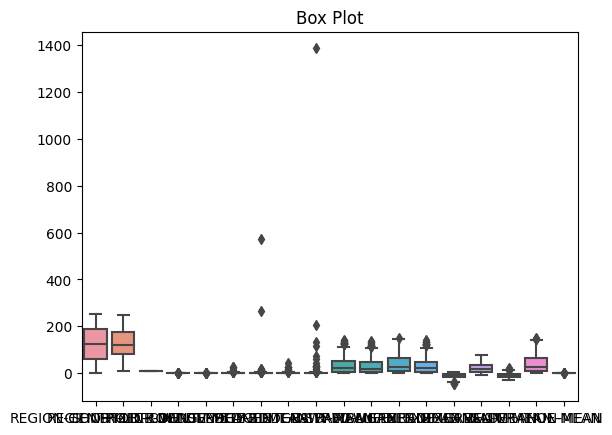

In [110]:
import seaborn as sns

# Box plot to identify outliers
sns.boxplot(data=data)
plt.title('Box Plot')
plt.show()

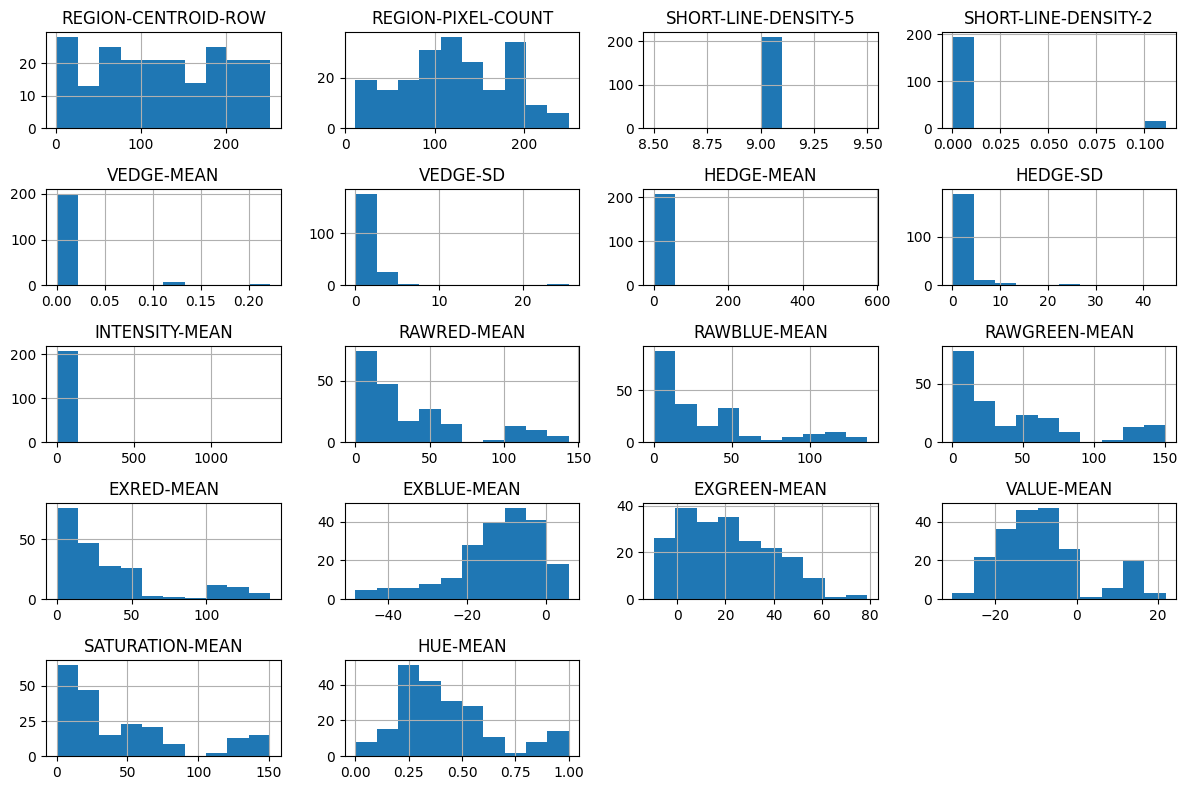

In [111]:
import matplotlib.pyplot as plt

# Plot histograms of numerical features
data.hist(figsize=(12, 8))
plt.tight_layout()
plt.show()

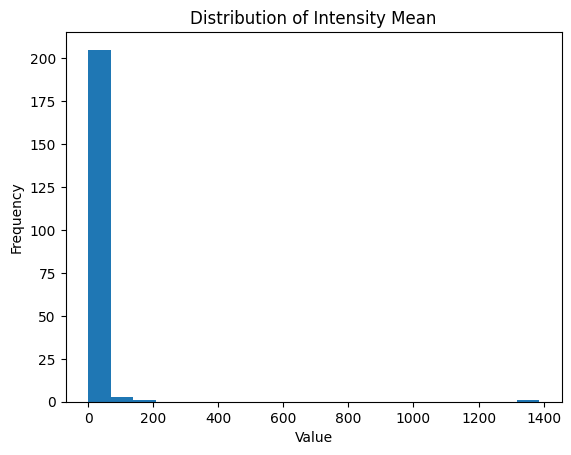

In [112]:
import matplotlib.pyplot as plt

# Visualize the distribution of a numerical feature
plt.hist(data['INTENSITY-MEAN'], bins=20)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Distribution of Intensity Mean')
plt.show()


#**Coorelation Analysis**

<ipython-input-113-d0ac522ad2a5>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


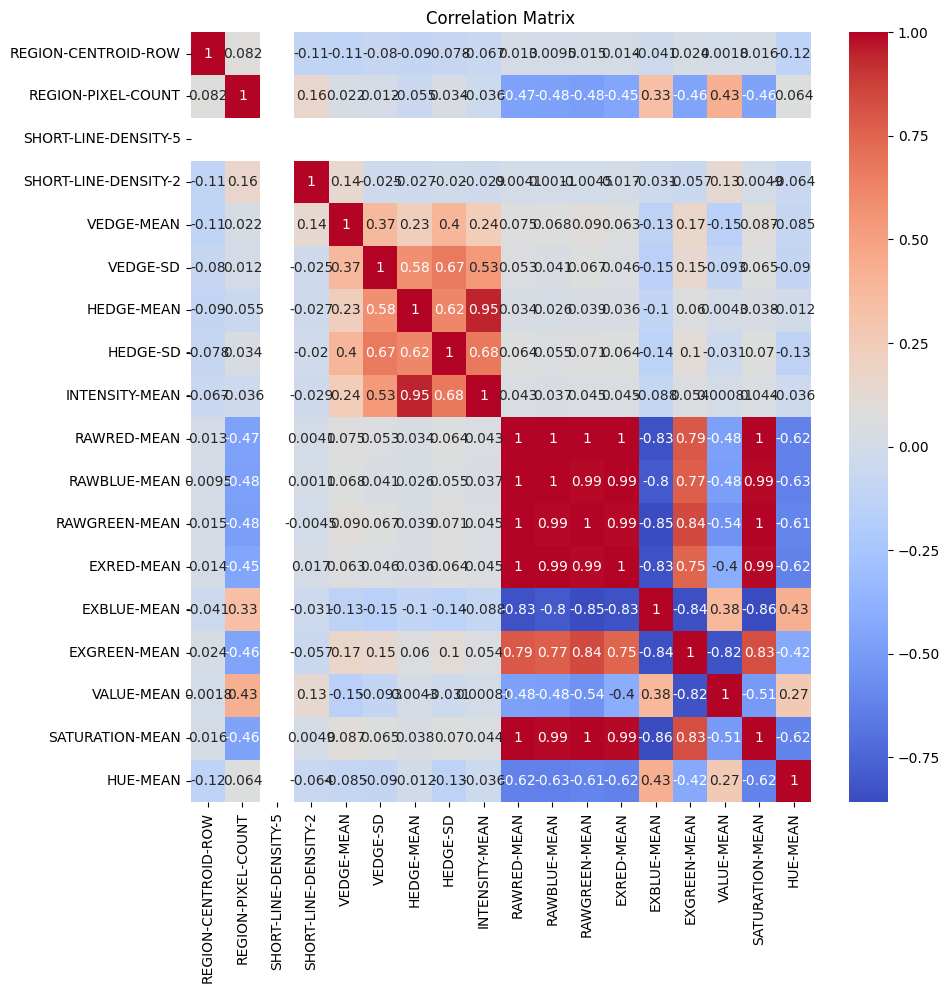

In [113]:
import seaborn as sns

# Calculate the correlation matrix
correlation_matrix = data.corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(10, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

#**Feature Selection**

In [114]:
import pandas as pd
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LogisticRegression


# Separate features and target variable
X = data.drop('REGION-CENTROID-COL',axis=1)
y = data['REGION-CENTROID-COL']

# Perform feature selection using RFE with cross-validation
estimator = LogisticRegression()
selector = RFECV(estimator, cv=5)
X_new = selector.fit_transform(X, y)

# Get the selected feature indices
selected_indices = selector.get_support(indices=True)
selected_features = X.columns[selected_indices]

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

#**Feature Extraction - PCA**

In [115]:
import pandas as pd
from sklearn.decomposition import PCA


# Perform feature extraction using PCA
n_components = 10  # Number of principal components to extract
pca = PCA(n_components=n_components)
X_new = pca.fit_transform(X)

# Convert the extracted components back to a DataFrame
columns = [f'PC{i}' for i in range(1, n_components+1)]
X_new = pd.DataFrame(X_new, columns=columns)

# Concatenate the extracted components with the target variable
data_extracted = pd.concat([X_new, y], axis=1)

# Check the updated data
print(data_extracted.head())


         PC1        PC2        PC3        PC4       PC5       PC6        PC7  \
0 -29.274454  65.331223  10.816026  28.905154  3.670107 -1.775233  -9.163849   
1 -34.553339  66.570403  59.104599  26.750537  4.514670 -0.895009 -11.648498   
2 -27.242806  71.904926 -22.348493  12.331846  3.861868 -2.124479 -10.340216   
3 -20.557326  73.414263 -92.807196   6.380089  5.007876 -2.953277 -11.233634   
4 -18.192801  62.360860 -90.475917  30.265299  3.411658 -2.906218  -7.425729   

        PC8       PC9      PC10 REGION-CENTROID-COL  
0 -0.937699 -0.421450 -0.142443                 NaN  
1 -0.782419 -0.298807  0.352214           BRICKFACE  
2 -0.968352 -0.493137 -0.116605           BRICKFACE  
3 -0.752698 -0.353380  0.766267           BRICKFACE  
4 -0.867824 -0.109318  0.032178           BRICKFACE  


#**Feature Scaling - Standardization**

In [116]:
import pandas as pd
from sklearn.preprocessing import StandardScaler


# Perform standardization
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Convert the scaled data back to a DataFrame
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

# Check the scaled data
print(X_scaled.head())

   REGION-CENTROID-ROW  REGION-PIXEL-COUNT  SHORT-LINE-DENSITY-5  \
0             0.207668            0.038669                   0.0   
1             0.856954            0.176598                   0.0   
2            -0.265769            0.280044                   0.0   
3            -1.226171            0.245562                   0.0   
4            -1.158537           -0.202706                   0.0   

   SHORT-LINE-DENSITY-2  VEDGE-MEAN  VEDGE-SD  HEDGE-MEAN  HEDGE-SD  \
0             -0.287183   -0.211604 -0.522856   -0.130359 -0.404770   
1             -0.287183   -0.211604 -0.505223   -0.125664 -0.439588   
2             -0.287183   -0.211604 -0.522856   -0.129335 -0.369952   
3             -0.287183   -0.211604 -0.452325   -0.127969 -0.311923   
4             -0.287183   -0.211604 -0.381793   -0.123189 -0.358347   

   INTENSITY-MEAN  RAWRED-MEAN  RAWBLUE-MEAN  RAWGREEN-MEAN  EXRED-MEAN  \
0       -0.116586    -0.800981     -0.722995      -0.831680   -0.831478   
1       -0.118

In [117]:
from sklearn.model_selection import train_test_split

# Load the dataset
X = data.drop('REGION-CENTROID-COL',axis=1)
y = data['REGION-CENTROID-COL']

# Split the data into training and testing sets
test_size = 0.2  
random_state = 42  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


(168, 18)
(42, 18)
(168,)
(42,)


#**1. KNN**

In [118]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Create an instance of the KNeighborsClassifier
k = 5  # Number of neighbors
knn = KNeighborsClassifier(n_neighbors=k)

# Fit the model to the training data
knn.fit(X_train, y_train)

# Predict the target variable for the test features
y_pred1 = knn.predict(X_test)

# Calculate the accuracy of the model
accuracy_knn = accuracy_score(y_test, y_pred1)
accuracy_knn


0.6904761904761905

In [119]:
print('Misclassifiaction samples=',(y_test!=y_pred1).sum())

Misclassifiaction samples= 13


In [120]:
from sklearn.metrics import classification_report
cr_knn = classification_report(y_test,y_pred1)
print(cr_knn)

              precision    recall  f1-score   support

   BRICKFACE       0.36      0.80      0.50         5
      CEMENT       0.50      0.33      0.40         6
     FOLIAGE       0.50      0.57      0.53         7
       GRASS       1.00      1.00      1.00         8
        PATH       1.00      1.00      1.00         7
         SKY       1.00      1.00      1.00         3
      WINDOW       1.00      0.17      0.29         6

    accuracy                           0.69        42
   macro avg       0.77      0.70      0.67        42
weighted avg       0.77      0.69      0.67        42



In [121]:
from sklearn.metrics import confusion_matrix
cm_knn = confusion_matrix(y_test,y_pred1)
print(cm_knn)

[[4 1 0 0 0 0 0]
 [3 2 1 0 0 0 0]
 [3 0 4 0 0 0 0]
 [0 0 0 8 0 0 0]
 [0 0 0 0 7 0 0]
 [0 0 0 0 0 3 0]
 [1 1 3 0 0 0 1]]


<Axes: >

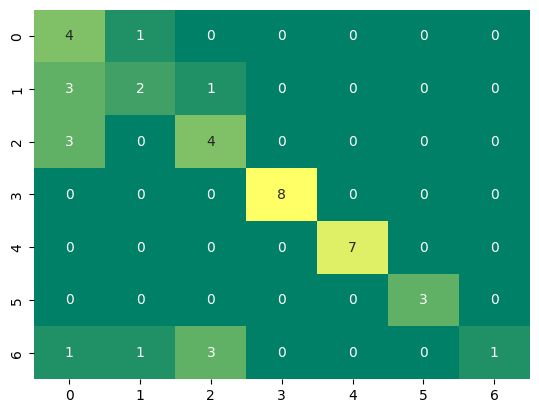

In [122]:
sns.heatmap(cm_knn,annot=True,cbar=False,cmap='summer')

#**2. SVM**

In [123]:
from sklearn import svm
from sklearn.metrics import accuracy_score

# Create an instance of the SVM classifier
svm_classifier = svm.SVC(kernel='linear')

# Fit the model to the training data
svm_classifier.fit(X_train, y_train)

# Predict the target variable for the test features
y_pred2 = svm_classifier.predict(X_test)

# Calculate the accuracy of the model
accuracy_svm = accuracy_score(y_test, y_pred2)
accuracy_svm


0.8571428571428571

In [124]:
print('Misclassifiaction samples=',(y_test!=y_pred2).sum())

Misclassifiaction samples= 6


In [125]:
from sklearn.metrics import classification_report
cr_svm = classification_report(y_test,y_pred2)
print(cr_svm)

              precision    recall  f1-score   support

   BRICKFACE       1.00      1.00      1.00         5
      CEMENT       0.67      0.67      0.67         6
     FOLIAGE       0.86      0.86      0.86         7
       GRASS       1.00      1.00      1.00         8
        PATH       0.78      1.00      0.88         7
         SKY       1.00      1.00      1.00         3
      WINDOW       0.75      0.50      0.60         6

    accuracy                           0.86        42
   macro avg       0.86      0.86      0.86        42
weighted avg       0.86      0.86      0.85        42



In [126]:
from sklearn.metrics import confusion_matrix
cm_svm = confusion_matrix(y_test,y_pred2)
print(cm_svm)

[[5 0 0 0 0 0 0]
 [0 4 0 0 2 0 0]
 [0 0 6 0 0 0 1]
 [0 0 0 8 0 0 0]
 [0 0 0 0 7 0 0]
 [0 0 0 0 0 3 0]
 [0 2 1 0 0 0 3]]


<Axes: >

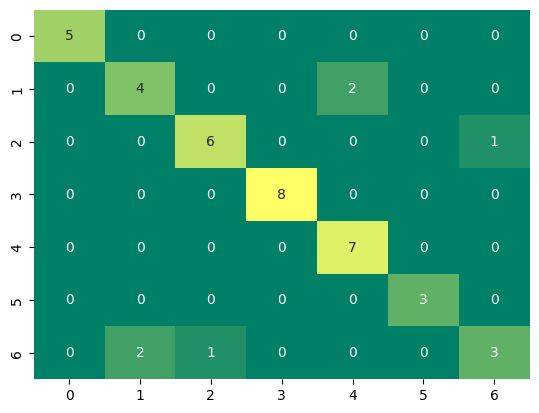

In [127]:
sns.heatmap(cm_svm,annot=True,cbar=False,cmap='summer')

#**3. Naive Bayes Classifier**

In [128]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

# Create an instance of the Gaussian Naive Bayes classifier
naive_bayes_classifier = GaussianNB()

# Fit the model to the training data
naive_bayes_classifier.fit(X_train, y_train)

# Predict the target variable for the test features
y_pred3 = naive_bayes_classifier.predict(X_test)

# Calculate the accuracy of the model
accuracy_naive = accuracy_score(y_test, y_pred3)
accuracy_naive

0.6428571428571429

In [129]:
print('Misclassifiaction samples=',(y_test!=y_pred3).sum())

Misclassifiaction samples= 15


In [130]:
from sklearn.metrics import classification_report
cr_naive = classification_report(y_test,y_pred3)
print(cr_naive)

              precision    recall  f1-score   support

   BRICKFACE       0.50      0.40      0.44         5
      CEMENT       0.75      0.50      0.60         6
     FOLIAGE       0.33      0.14      0.20         7
       GRASS       1.00      1.00      1.00         8
        PATH       1.00      1.00      1.00         7
         SKY       1.00      1.00      1.00         3
      WINDOW       0.23      0.50      0.32         6

    accuracy                           0.64        42
   macro avg       0.69      0.65      0.65        42
weighted avg       0.68      0.64      0.65        42



In [131]:
from sklearn.metrics import confusion_matrix
cm_naive = confusion_matrix(y_test,y_pred3)
print(cm_naive)

[[2 0 0 0 0 0 3]
 [1 3 0 0 0 0 2]
 [1 0 1 0 0 0 5]
 [0 0 0 8 0 0 0]
 [0 0 0 0 7 0 0]
 [0 0 0 0 0 3 0]
 [0 1 2 0 0 0 3]]


<Axes: >

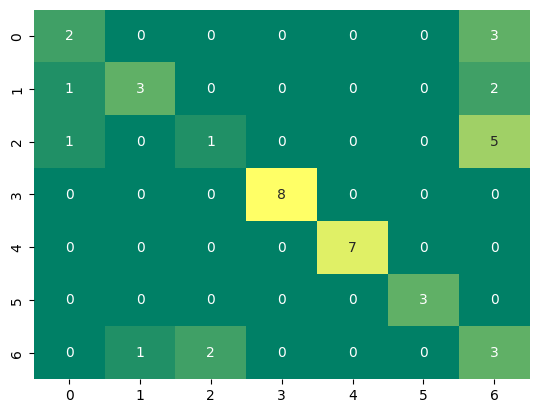

In [132]:
sns.heatmap(cm_naive,annot=True,cbar=False,cmap='summer')

#**4. Random Forest Classifier**

In [133]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Create an instance of the Random Forest classifier
random_forest_classifier = RandomForestClassifier(n_estimators=100, random_state=random_state)

# Fit the model to the training data
random_forest_classifier.fit(X_train, y_train)

# Predict the target variable for the test features
y_pred4 = random_forest_classifier.predict(X_test)

# Calculate the accuracy of the model
accuracy_random = accuracy_score(y_test, y_pred4)
accuracy_random

0.8571428571428571

In [134]:
print('Misclassifiaction samples=',(y_test!=y_pred4).sum())

Misclassifiaction samples= 6


In [135]:
from sklearn.metrics import classification_report
cr_random = classification_report(y_test,y_pred4)
print(cr_random)

              precision    recall  f1-score   support

   BRICKFACE       1.00      1.00      1.00         5
      CEMENT       0.75      0.50      0.60         6
     FOLIAGE       0.86      0.86      0.86         7
       GRASS       1.00      1.00      1.00         8
        PATH       0.78      1.00      0.88         7
         SKY       1.00      1.00      1.00         3
      WINDOW       0.67      0.67      0.67         6

    accuracy                           0.86        42
   macro avg       0.86      0.86      0.86        42
weighted avg       0.86      0.86      0.85        42



In [136]:
from sklearn.metrics import confusion_matrix
cm_random = confusion_matrix(y_test,y_pred4)
print(cm_random)

[[5 0 0 0 0 0 0]
 [0 3 0 0 2 0 1]
 [0 0 6 0 0 0 1]
 [0 0 0 8 0 0 0]
 [0 0 0 0 7 0 0]
 [0 0 0 0 0 3 0]
 [0 1 1 0 0 0 4]]


<Axes: >

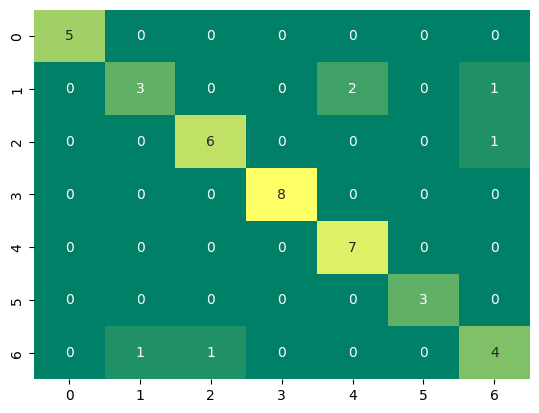

In [137]:
sns.heatmap(cm_random,annot=True,cbar=False,cmap='summer')

#**5. Logistic Regression**

In [138]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Create an instance of the Logistic Regression classifier
logistic_regression_classifier = LogisticRegression(random_state=random_state)

# Fit the model to the training data
logistic_regression_classifier.fit(X_train, y_train)

# Predict the target variable for the test features
y_pred5 = logistic_regression_classifier.predict(X_test)

# Calculate the accuracy of the model
accuracy_lr = accuracy_score(y_test, y_pred5)
accuracy_lr

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.7857142857142857

In [139]:
print('Misclassifiaction samples=',(y_test!=y_pred5).sum())

Misclassifiaction samples= 9


In [140]:
from sklearn.metrics import classification_report
cr_lr = classification_report(y_test,y_pred5)
print(cr_lr)

              precision    recall  f1-score   support

   BRICKFACE       1.00      1.00      1.00         5
      CEMENT       0.67      0.33      0.44         6
     FOLIAGE       0.67      0.86      0.75         7
       GRASS       1.00      1.00      1.00         8
        PATH       0.88      1.00      0.93         7
         SKY       1.00      1.00      1.00         3
      WINDOW       0.33      0.33      0.33         6

    accuracy                           0.79        42
   macro avg       0.79      0.79      0.78        42
weighted avg       0.78      0.79      0.77        42



In [141]:
from sklearn.metrics import confusion_matrix
cm_lr = confusion_matrix(y_test,y_pred5)
print(cm_lr)

[[5 0 0 0 0 0 0]
 [0 2 0 0 1 0 3]
 [0 0 6 0 0 0 1]
 [0 0 0 8 0 0 0]
 [0 0 0 0 7 0 0]
 [0 0 0 0 0 3 0]
 [0 1 3 0 0 0 2]]


<Axes: >

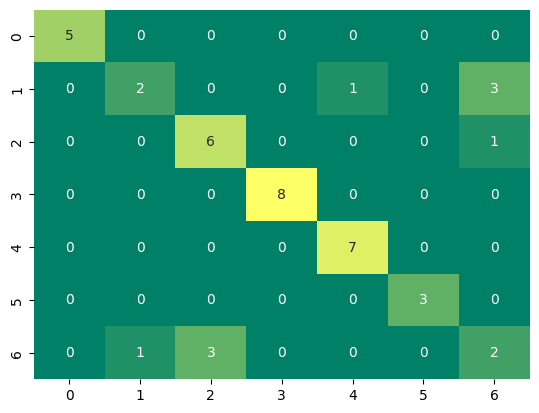

In [142]:
sns.heatmap(cm_lr,annot=True,cbar=False,cmap='summer')

#**Model Comparison**

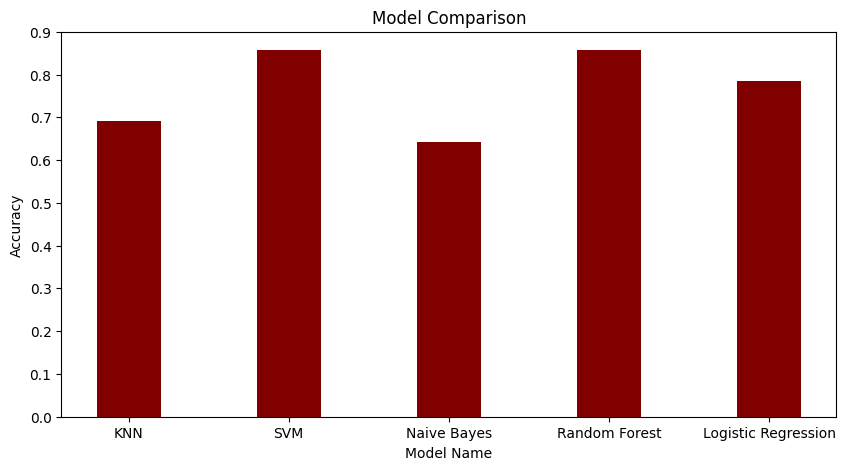

In [143]:
acc = [accuracy_knn,accuracy_svm,accuracy_naive,accuracy_random,accuracy_lr]
model_name = ["KNN","SVM","Naive Bayes","Random Forest","Logistic Regression"]
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(model_name,acc, color ='maroon',
        width = 0.4)
 
plt.xlabel("Model Name")
plt.ylabel("Accuracy")
plt.title("Model Comparison")
plt.show()
